In [51]:
import pandas as pd
from sklearn.cluster import KMeans
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

## Clustering

### Loading the Data

In [2]:
# Load the users_with_attributes dataframe
users_with_attributes = pd.read_pickle('pickle_dataframes/users_with_attributes.pkl')

In [3]:
# Display the dataframe
users_with_attributes

,Id,Reputation,CreationDate,LastAccessDate,Views,UpVotes,DownVotes,QuestionCount,AnswerCount,CommentCount,TotalActivity,AvgQuestionBodySentiment,AvgQuestionTitleSentiment,AvgAnswerSentiment,AvgCommentSentiment,AvgQuestionScore,AvgAnswerScore,AvgCommentScore,AcceptedAnswerCount,AcceptedAnswerFraction
0,-1,1,2012-12-04 20:12:06.337,2012-12-04 20:12:06.337,267,5442,6725,881.0,1320.0,8879.0,11080.0,0.182188,0.013791,0.178233,0.085863,6.820658,7.738636,1.578669,135.0,0.102273
5,5,315,2012-12-04 20:36:06.517,2021-07-05 18:03:41.037,49,14,58,0.0,3.0,31.0,34.0,0.000000,0.000000,0.185433,0.469406,NaN,7.000000,1.193548,1.0,0.333333
8,8,2777,2012-12-04 20:52:37.450,2022-07-31 22:39:03.850,832,37,5,0.0,13.0,10.0,23.0,0.000000,0.000000,0.689277,0.049030,NaN,20.230769,1.500000,7.0,0.538462
18,18,5325,2012-12-04 21:37:27.683,2013-12-18 15:57:41.670,427,110,11,16.0,20.0,65.0,101.0,0.661300,0.212294,0.287115,0.189645,13.562500,13.700000,0.769231,10.0,0.500000
23,23,16227,2012-12-04 21:49:39.360,2015-02-14 02:38:09.917,1449,803,54,36.0,124.0,277.0,437.0,0.381967,0.141828,0.374322,0.199965,13.361111,7.782258,1.321300,44.0,0.354839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37644,46025,141,2023-03-19 12:16:59.447,2023-06-27 09:27:37.477,50,0,0,2.0,0.0,16.0,18.0,0.159400,0.000000,0.000000,-0.111800,-2.000000,NaN,0.000000,NaN,NaN
37863,46253,251,2023-04-07 18:35:35.903,2023-07-22 21:32:54.697,6,3,9,0.0,6.0,10.0,16.0,0.000000,0.000000,0.666883,-0.105290,NaN,1.833333,1.200000,NaN,NaN
38111,46524,448,2023-05-17 19:13:21.650,2023-08-19 21:16:59.250,100,37,31,8.0,0.0,15.0,23.0,0.181063,0.299013,0.000000,0.189967,2.250000,NaN,0.600000,NaN,NaN
38246,46665,597,2023-06-07 21:14:53.120,2023-08-17 09:54:23.023,3,0,0,2.0,6.0,11.0,19.0,0.620450,0.255300,-0.036367,0.034573,6.500000,5.333333,0.727273,2.0,0.333333


### 1. Clustering by Activity Metrics

#### 1.1 Clustering by question count, answer count, and comment count

In [4]:
users_with_attributes.columns

Index(['Id', 'Reputation', 'CreationDate', 'LastAccessDate', 'Views',
       'UpVotes', 'DownVotes', 'QuestionCount', 'AnswerCount', 'CommentCount',
       'TotalActivity', 'AvgQuestionBodySentiment',
       'AvgQuestionTitleSentiment', 'AvgAnswerSentiment',
       'AvgCommentSentiment', 'AvgQuestionScore', 'AvgAnswerScore',
       'AvgCommentScore', 'AcceptedAnswerCount', 'AcceptedAnswerFraction'],
      dtype='object')

In [5]:
clustering_features = users_with_attributes[['QuestionCount', 'AnswerCount', 'CommentCount']]

clustering_features

,QuestionCount,AnswerCount,CommentCount
0,881.0,1320.0,8879.0
5,0.0,3.0,31.0
8,0.0,13.0,10.0
18,16.0,20.0,65.0
23,36.0,124.0,277.0
...,...,...,...
37644,2.0,0.0,16.0
37863,0.0,6.0,10.0
38111,8.0,0.0,15.0
38246,2.0,6.0,11.0


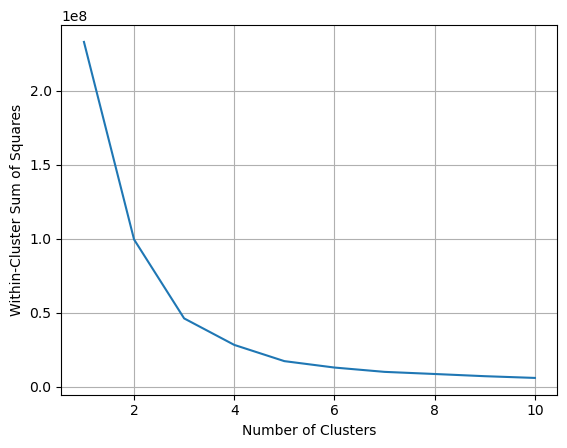

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(clustering_features)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.grid(True)
plt.show()

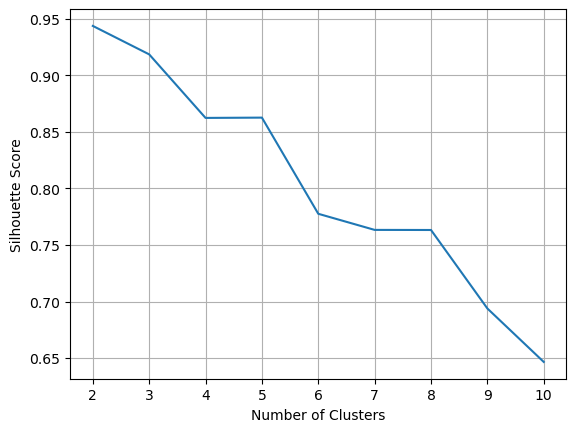

In [7]:
silhouette_scores = []
for i in range(2, 11):  # Starting from 2 clusters since silhouette score can't be computed with 1 cluster
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(clustering_features)
    silhouette_avg = silhouette_score(clustering_features, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.figure()
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [8]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(clustering_features)

users_with_attributes['Cluster1.1'] = kmeans.labels_

In [9]:
cluster_counts = users_with_attributes['Cluster1.1'].value_counts()

cluster_counts

Cluster1.1
0    1442
1      22
Name: count, dtype: int64

In [10]:
cluster_stats = users_with_attributes.groupby('Cluster1.1')[clustering_features.columns].mean()

cluster_stats

,QuestionCount,AnswerCount,CommentCount
Cluster1.1,,,
0,6.033287,15.410541,77.443135
1,124.318182,429.545455,2521.272727


In [11]:
cluster_stats_all = users_with_attributes.groupby('Cluster1.1').mean()

cluster_stats_all

,Id,Reputation,CreationDate,LastAccessDate,Views,UpVotes,DownVotes,QuestionCount,AnswerCount,CommentCount,TotalActivity,AvgQuestionBodySentiment,AvgQuestionTitleSentiment,AvgAnswerSentiment,AvgCommentSentiment,AvgQuestionScore,AvgAnswerScore,AvgCommentScore,AcceptedAnswerCount,AcceptedAnswerFraction
Cluster1.1,,,,,,,,,,,,,,,,,,,,
0,15944.003467,2067.832871,2017-05-26 05:50:31.633808640,2022-10-18 04:17:34.059314688,191.434119,198.393897,46.551318,6.033287,15.410541,77.443135,98.886963,0.142564,0.008583,0.168567,0.088496,9.538785,8.430529,1.815307,4.983819,0.242934
1,9328.318182,44870.636364,2016-01-21 02:17:51.863272704,2023-03-06 20:19:57.900590848,3105.545455,2687.227273,1375.272727,124.318182,429.545455,2521.272727,3075.136364,0.120404,0.077088,0.200376,0.073712,7.245639,10.870374,1.748476,41.294118,0.092400


### 2. Clustering by Quality and Reputation Metrics

#### 2.1 Clustering by reputation, average question score, average answer score, and average comment score

In [13]:
users_with_attributes.columns

Index(['Id', 'Reputation', 'CreationDate', 'LastAccessDate', 'Views',
       'UpVotes', 'DownVotes', 'QuestionCount', 'AnswerCount', 'CommentCount',
       'TotalActivity', 'AvgQuestionBodySentiment',
       'AvgQuestionTitleSentiment', 'AvgAnswerSentiment',
       'AvgCommentSentiment', 'AvgQuestionScore', 'AvgAnswerScore',
       'AvgCommentScore', 'AcceptedAnswerCount', 'AcceptedAnswerFraction',
       'Cluster1.1'],
      dtype='object')

In [14]:
clustering_features = users_with_attributes[['Reputation', 'AvgQuestionScore', 'AvgAnswerScore', 'AvgCommentScore']]

clustering_features

,Reputation,AvgQuestionScore,AvgAnswerScore,AvgCommentScore
0,1,6.820658,7.738636,1.578669
5,315,NaN,7.000000,1.193548
8,2777,NaN,20.230769,1.500000
18,5325,13.562500,13.700000,0.769231
23,16227,13.361111,7.782258,1.321300
...,...,...,...,...
37644,141,-2.000000,NaN,0.000000
37863,251,NaN,1.833333,1.200000
38111,448,2.250000,NaN,0.600000
38246,597,6.500000,5.333333,0.727273


In [15]:
clustering_features_imputed = clustering_features.fillna(clustering_features.mean())

clustering_features_imputed

,Reputation,AvgQuestionScore,AvgAnswerScore,AvgCommentScore
0,1,6.820658,7.738636,1.578669
5,315,9.486668,7.000000,1.193548
8,2777,9.486668,20.230769,1.500000
18,5325,13.562500,13.700000,0.769231
23,16227,13.361111,7.782258,1.321300
...,...,...,...,...
37644,141,-2.000000,8.474853,0.000000
37863,251,9.486668,1.833333,1.200000
38111,448,2.250000,8.474853,0.600000
38246,597,6.500000,5.333333,0.727273


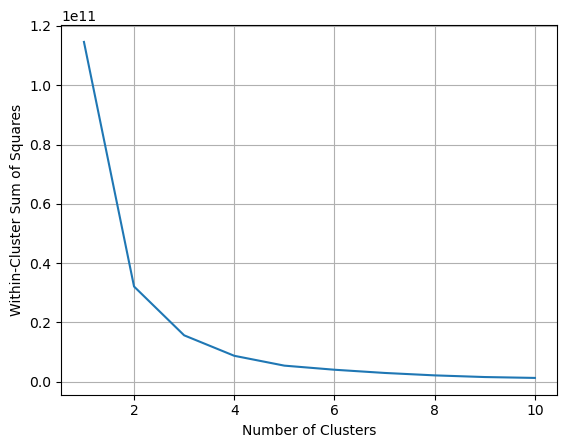

In [16]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(clustering_features_imputed)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.grid(True)
plt.show()

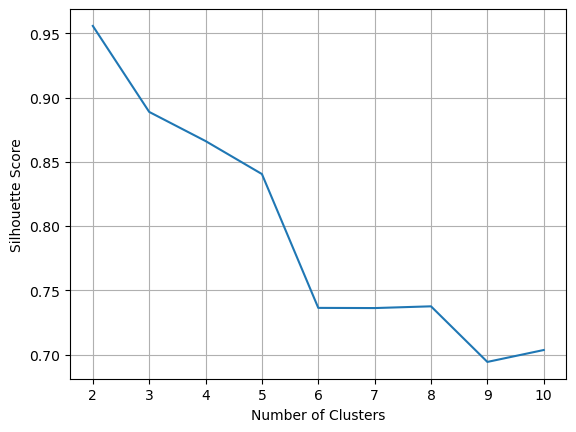

In [17]:
silhouette_scores = []
for i in range(2, 11):  # Starting from 2 clusters since silhouette score can't be computed with 1 cluster
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(clustering_features_imputed)
    silhouette_avg = silhouette_score(clustering_features_imputed, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.figure()
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [18]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(clustering_features_imputed)

users_with_attributes['Cluster2.1'] = kmeans.labels_

In [19]:
cluster_counts = users_with_attributes['Cluster2.1'].value_counts()

cluster_counts

Cluster2.1
0    1448
1      16
Name: count, dtype: int64

In [20]:
cluster_stats = users_with_attributes.groupby('Cluster2.1')[clustering_features.columns].mean()

cluster_stats

,Reputation,AvgQuestionScore,AvgAnswerScore,AvgCommentScore
Cluster2.1,,,,
0,1922.008287,9.472841,8.429635,1.815241
1,74118.812500,10.385368,11.852085,1.729446


In [21]:
cluster_stats_all = users_with_attributes.groupby('Cluster2.1').mean()

cluster_stats_all

,Id,Reputation,CreationDate,LastAccessDate,Views,UpVotes,DownVotes,QuestionCount,AnswerCount,CommentCount,...,AvgQuestionBodySentiment,AvgQuestionTitleSentiment,AvgAnswerSentiment,AvgCommentSentiment,AvgQuestionScore,AvgAnswerScore,AvgCommentScore,AcceptedAnswerCount,AcceptedAnswerFraction,Cluster1.1
Cluster2.1,,,,,,,,,,,,,,,,,,,,,
0,15886.01105,1922.008287,2017-05-21 19:45:23.448376576,2022-10-17 19:15:12.993138176,175.803867,207.028315,53.180939,6.218232,15.571823,94.911602,...,0.141069,0.009483,0.168544,0.088172,9.472841,8.429635,1.815241,5.050955,0.240091,0.008287
1,12095.75000,74118.812500,2016-08-23 22:42:57.730937600,2023-06-01 07:23:38.330062592,5612.875000,2839.125000,1273.562500,151.937500,570.250000,1856.812500,...,0.247413,0.021403,0.214379,0.097505,10.385368,11.852085,1.729446,54.666667,0.104069,0.625000


#### 2.2 Clustering by accepted answer count and accepted answer fraction

In [22]:
users_with_attributes.columns

Index(['Id', 'Reputation', 'CreationDate', 'LastAccessDate', 'Views',
       'UpVotes', 'DownVotes', 'QuestionCount', 'AnswerCount', 'CommentCount',
       'TotalActivity', 'AvgQuestionBodySentiment',
       'AvgQuestionTitleSentiment', 'AvgAnswerSentiment',
       'AvgCommentSentiment', 'AvgQuestionScore', 'AvgAnswerScore',
       'AvgCommentScore', 'AcceptedAnswerCount', 'AcceptedAnswerFraction',
       'Cluster1.1', 'Cluster2.1'],
      dtype='object')

In [23]:
clustering_features = users_with_attributes[['AcceptedAnswerCount', 'AcceptedAnswerFraction']]

clustering_features

,AcceptedAnswerCount,AcceptedAnswerFraction
0,135.0,0.102273
5,1.0,0.333333
8,7.0,0.538462
18,10.0,0.500000
23,44.0,0.354839
...,...,...
37644,NaN,NaN
37863,NaN,NaN
38111,NaN,NaN
38246,2.0,0.333333


In [24]:
clustering_features_imputed = clustering_features.fillna(clustering_features.mean())

clustering_features_imputed

,AcceptedAnswerCount,AcceptedAnswerFraction
0,135.000000,0.102273
5,1.000000,0.333333
8,7.000000,0.538462
18,10.000000,0.500000
23,44.000000,0.354839
...,...,...
37644,6.877301,0.235084
37863,6.877301,0.235084
38111,6.877301,0.235084
38246,2.000000,0.333333


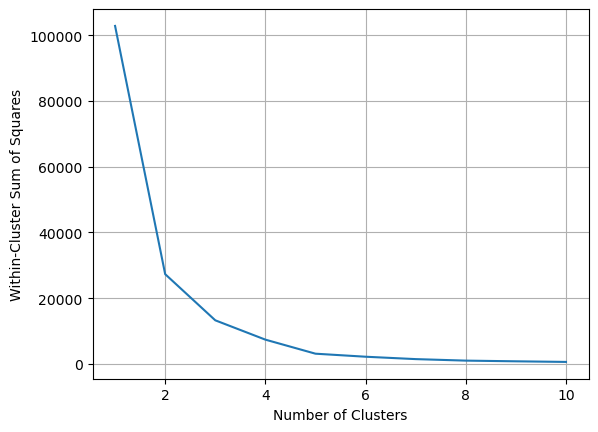

In [25]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(clustering_features_imputed)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.grid(True)
plt.show()

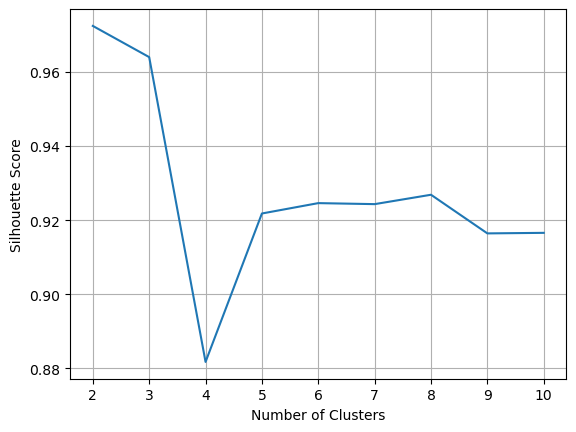

In [26]:
silhouette_scores = []
for i in range(2, 11):  # Starting from 2 clusters since silhouette score can't be computed with 1 cluster
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(clustering_features_imputed)
    silhouette_avg = silhouette_score(clustering_features_imputed, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.figure()
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [27]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(clustering_features_imputed)

users_with_attributes['Cluster2.2'] = kmeans.labels_

In [28]:
cluster_counts = users_with_attributes['Cluster2.2'].value_counts()

cluster_counts

Cluster2.2
0    1454
1      10
Name: count, dtype: int64

In [29]:
cluster_stats = users_with_attributes.groupby('Cluster2.2')[clustering_features.columns].mean()

cluster_stats

,AcceptedAnswerCount,AcceptedAnswerFraction
Cluster2.2,,
0,4.136076,0.236872
1,93.500000,0.178602


In [30]:
cluster_stats_all = users_with_attributes.groupby('Cluster2.2').mean()

cluster_stats_all

,Id,Reputation,CreationDate,LastAccessDate,Views,UpVotes,DownVotes,QuestionCount,AnswerCount,CommentCount,...,AvgQuestionTitleSentiment,AvgAnswerSentiment,AvgCommentSentiment,AvgQuestionScore,AvgAnswerScore,AvgCommentScore,AcceptedAnswerCount,AcceptedAnswerFraction,Cluster1.1,Cluster2.1
Cluster2.2,,,,,,,,,,,,,,,,,,,,,
0,15922.101788,2344.261348,2017-05-25 06:58:55.963958784,2022-10-21 19:35:35.733092352,220.730399,218.671252,55.141678,7.022008,17.425722,97.295736,...,0.009022,0.168277,0.088025,9.491062,8.456092,1.815456,4.136076,0.236872,0.010316,0.006878
1,4574.000000,56041.300000,2014-10-27 05:04:30.534799872,2022-03-10 13:17:35.142899968,2342.800000,2725.500000,1720.700000,122.500000,633.500000,2567.300000,...,0.095458,0.280673,0.124572,9.039914,10.727975,1.646608,93.500000,0.178602,0.700000,0.600000


### 3. Clustering by Sentiment Metrics

#### 3.1 Clustering by average question body sentiment, average question title sentiment, average answer sentiment, average comment sentiment

In [31]:
users_with_attributes.columns

Index(['Id', 'Reputation', 'CreationDate', 'LastAccessDate', 'Views',
       'UpVotes', 'DownVotes', 'QuestionCount', 'AnswerCount', 'CommentCount',
       'TotalActivity', 'AvgQuestionBodySentiment',
       'AvgQuestionTitleSentiment', 'AvgAnswerSentiment',
       'AvgCommentSentiment', 'AvgQuestionScore', 'AvgAnswerScore',
       'AvgCommentScore', 'AcceptedAnswerCount', 'AcceptedAnswerFraction',
       'Cluster1.1', 'Cluster2.1', 'Cluster2.2'],
      dtype='object')

In [32]:
clustering_features = users_with_attributes[['AvgQuestionBodySentiment', 'AvgQuestionTitleSentiment', 'AvgAnswerSentiment', 'AvgCommentSentiment']]

clustering_features

,AvgQuestionBodySentiment,AvgQuestionTitleSentiment,AvgAnswerSentiment,AvgCommentSentiment
0,0.182188,0.013791,0.178233,0.085863
5,0.000000,0.000000,0.185433,0.469406
8,0.000000,0.000000,0.689277,0.049030
18,0.661300,0.212294,0.287115,0.189645
23,0.381967,0.141828,0.374322,0.199965
...,...,...,...,...
37644,0.159400,0.000000,0.000000,-0.111800
37863,0.000000,0.000000,0.666883,-0.105290
38111,0.181063,0.299013,0.000000,0.189967
38246,0.620450,0.255300,-0.036367,0.034573


In [33]:
clustering_features_imputed = clustering_features.fillna(clustering_features.mean())

clustering_features_imputed

,AvgQuestionBodySentiment,AvgQuestionTitleSentiment,AvgAnswerSentiment,AvgCommentSentiment
0,0.182188,0.013791,0.178233,0.085863
5,0.000000,0.000000,0.185433,0.469406
8,0.000000,0.000000,0.689277,0.049030
18,0.661300,0.212294,0.287115,0.189645
23,0.381967,0.141828,0.374322,0.199965
...,...,...,...,...
37644,0.159400,0.000000,0.000000,-0.111800
37863,0.000000,0.000000,0.666883,-0.105290
38111,0.181063,0.299013,0.000000,0.189967
38246,0.620450,0.255300,-0.036367,0.034573


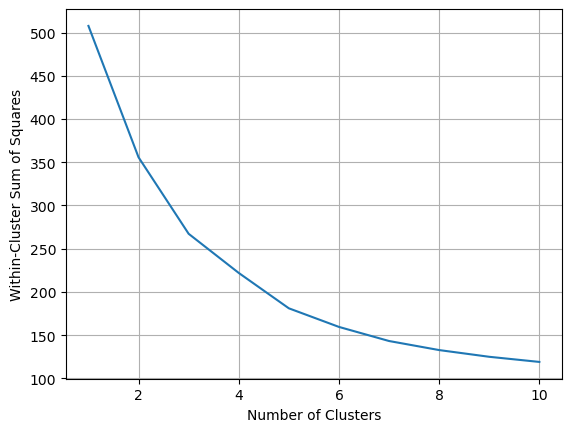

In [34]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(clustering_features_imputed)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.grid(True)
plt.show()

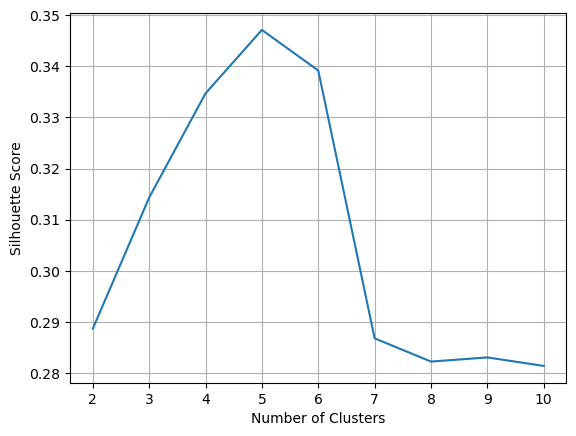

In [35]:
silhouette_scores = []
for i in range(2, 11):  # Starting from 2 clusters since silhouette score can't be computed with 1 cluster
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(clustering_features_imputed)
    silhouette_avg = silhouette_score(clustering_features_imputed, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.figure()
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [36]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(clustering_features_imputed)

users_with_attributes['Cluster3.1'] = kmeans.labels_

In [37]:
cluster_counts = users_with_attributes['Cluster3.1'].value_counts()

cluster_counts

Cluster3.1
1    633
0    313
3    287
2    119
4    112
Name: count, dtype: int64

In [38]:
cluster_stats = users_with_attributes.groupby('Cluster3.1')[clustering_features.columns].mean()

cluster_stats

,AvgQuestionBodySentiment,AvgQuestionTitleSentiment,AvgAnswerSentiment,AvgCommentSentiment
Cluster3.1,,,,
0,0.663262,0.110084,0.255603,0.132429
1,0.049704,0.000973,0.061685,0.067086
2,-0.579825,-0.223141,0.040942,0.039067
3,0.070386,0.011324,0.682525,0.112266
4,0.160365,0.020581,-0.645769,0.075431


In [39]:
cluster_stats_all = users_with_attributes.groupby('Cluster3.1').mean()

cluster_stats_all

,Id,Reputation,CreationDate,LastAccessDate,Views,UpVotes,DownVotes,QuestionCount,AnswerCount,CommentCount,...,AvgAnswerSentiment,AvgCommentSentiment,AvgQuestionScore,AvgAnswerScore,AvgCommentScore,AcceptedAnswerCount,AcceptedAnswerFraction,Cluster1.1,Cluster2.1,Cluster2.2
Cluster3.1,,,,,,,,,,,,,,,,,,,,,
0,15130.258786,3750.246006,2017-03-13 16:54:24.789242880,2022-09-23 02:00:09.242686976,248.162939,278.808307,91.993610,8.095847,28.031949,140.456869,...,0.255603,0.132429,9.908250,8.526056,1.523673,11.488372,0.217194,0.025559,0.019169,0.022364
1,15854.273302,3207.756714,2017-05-30 21:57:36.485723392,2022-12-05 08:54:36.873587712,267.849921,271.742496,77.285940,10.932070,27.665087,139.832543,...,0.061685,0.067086,9.938739,8.535197,1.993442,7.477941,0.165765,0.015798,0.014218,0.004739
2,17720.277311,2228.159664,2017-08-20 11:27:35.688109312,2022-09-02 17:19:18.931588352,299.168067,264.899160,48.142857,2.865546,21.042017,121.747899,...,0.040942,0.039067,8.823778,6.934141,1.538615,2.482759,0.228883,0.025210,0.000000,0.000000
3,16282.174216,1474.630662,2017-06-29 09:14:22.014798080,2022-10-03 23:09:05.358582016,179.972125,150.832753,42.512195,4.379791,8.843206,54.881533,...,0.682525,0.112266,8.902564,9.321364,1.865336,2.400000,0.360557,0.003484,0.003484,0.000000
4,14671.901786,680.910714,2017-02-18 18:27:13.368892928,2022-07-20 02:17:32.880633856,88.330357,99.205357,15.508929,3.419643,3.071429,39.508929,...,-0.645769,0.075431,8.045904,7.317928,1.776200,1.400000,0.476239,0.000000,0.000000,0.000000


### 4. Clustering by Engagement Metrics

#### 4.1 Clustering by views, upvotes, and downvotes

In [40]:
users_with_attributes.columns

Index(['Id', 'Reputation', 'CreationDate', 'LastAccessDate', 'Views',
       'UpVotes', 'DownVotes', 'QuestionCount', 'AnswerCount', 'CommentCount',
       'TotalActivity', 'AvgQuestionBodySentiment',
       'AvgQuestionTitleSentiment', 'AvgAnswerSentiment',
       'AvgCommentSentiment', 'AvgQuestionScore', 'AvgAnswerScore',
       'AvgCommentScore', 'AcceptedAnswerCount', 'AcceptedAnswerFraction',
       'Cluster1.1', 'Cluster2.1', 'Cluster2.2', 'Cluster3.1'],
      dtype='object')

In [41]:
clustering_features = users_with_attributes[['Views', 'UpVotes', 'DownVotes']]

clustering_features

,Views,UpVotes,DownVotes
0,267,5442,6725
5,49,14,58
8,832,37,5
18,427,110,11
23,1449,803,54
...,...,...,...
37644,50,0,0
37863,6,3,9
38111,100,37,31
38246,3,0,0


In [42]:
clustering_features_imputed = clustering_features.fillna(clustering_features.mean())

clustering_features_imputed

,Views,UpVotes,DownVotes
0,267,5442,6725
5,49,14,58
8,832,37,5
18,427,110,11
23,1449,803,54
...,...,...,...
37644,50,0,0
37863,6,3,9
38111,100,37,31
38246,3,0,0


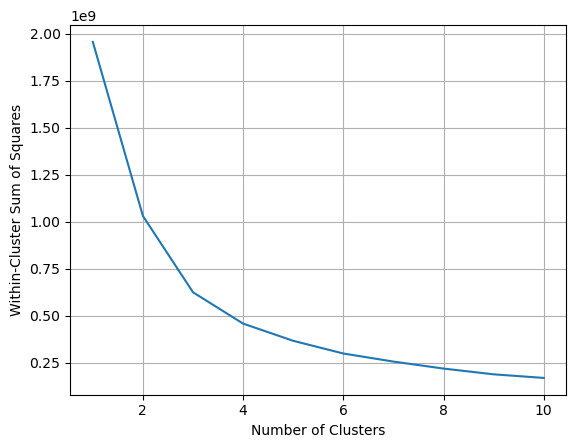

In [43]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(clustering_features_imputed)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.grid(True)
plt.show()

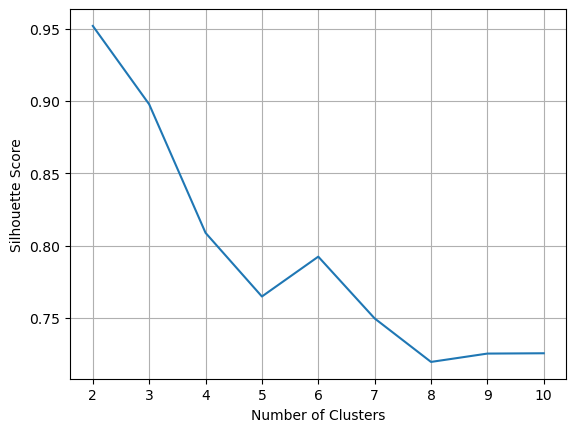

In [44]:
silhouette_scores = []
for i in range(2, 11):  # Starting from 2 clusters since silhouette score can't be computed with 1 cluster
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(clustering_features_imputed)
    silhouette_avg = silhouette_score(clustering_features_imputed, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.figure()
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [45]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(clustering_features_imputed)

users_with_attributes['Cluster4.1'] = kmeans.labels_

In [46]:
cluster_counts = users_with_attributes['Cluster4.1'].value_counts()

cluster_counts

Cluster4.1
0    1457
1       7
Name: count, dtype: int64

In [47]:
cluster_stats = users_with_attributes.groupby('Cluster4.1')[clustering_features.columns].mean()

cluster_stats

,Views,UpVotes,DownVotes
Cluster4.1,,,
0,184.173644,216.432395,58.927934
1,10861.285714,4265.857143,1646.428571


In [48]:
cluster_stats_all = users_with_attributes.groupby('Cluster4.1').mean()

cluster_stats_all

,Id,Reputation,CreationDate,LastAccessDate,Views,UpVotes,DownVotes,QuestionCount,AnswerCount,CommentCount,...,AvgCommentSentiment,AvgQuestionScore,AvgAnswerScore,AvgCommentScore,AcceptedAnswerCount,AcceptedAnswerFraction,Cluster1.1,Cluster2.1,Cluster2.2,Cluster3.1
Cluster4.1,,,,,,,,,,,,,,,,,,,,,
0,15831.838023,2382.998627,2017-05-18 03:52:31.235509248,2022-10-18 18:03:19.045936128,184.173644,216.432395,58.927934,6.498284,19.295813,103.398765,...,0.088284,9.492152,8.470726,1.816669,6.459627,0.237089,0.012354,0.006863,0.006177,1.490048
1,18498.285714,70991.428571,2017-10-11 20:04:23.829571328,2023-09-02 18:42:36.773714176,10861.285714,4265.857143,1646.428571,281.000000,508.285714,2355.571429,...,0.086335,8.768212,9.184642,1.321894,40.500000,0.073660,0.571429,0.857143,0.142857,1.285714


### Correlation between Clusters

In [50]:
correlation_matrix = users_with_attributes.iloc[:, -5:].corr()

correlation_matrix

,Cluster1.1,Cluster2.1,Cluster2.2,Cluster3.1,Cluster4.1
Cluster1.1,1.000000,0.527027,0.466915,-0.062484,0.316996
Cluster2.1,0.527027,1.000000,0.469875,-0.062838,0.564152
Cluster2.2,0.466915,0.469875,1.000000,-0.079760,0.114473
Cluster3.1,-0.062484,-0.062838,-0.079760,1.000000,-0.011401
Cluster4.1,0.316996,0.564152,0.114473,-0.011401,1.000000
